In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size']=24

import seaborn as sns
sns.set(font_scale=2)

from IPython.core.pylabtools import figsize

import os
root_direc = "."
Project_Name = 'BikeShare'
image_path = os.path.join(root_direc,"Images",Project_Name)

def savefigure(fig_id,tight_layout=True,fig_ext='.png',fig_deim=300):
    os.makedirs(image_path,exist_ok=True)
    fig_path = os.path.join(image_path,fig_id + "." + fig_ext)
    print("saving.....",fig_id)
    if tight_layout:
        plt.tight_layout()
        plt.savefig(fig_path,dpi=fig_deim)

import warnings
warnings.filterwarnings('ignore')

In [15]:
data_day = pd.read_csv('day.csv')
data_hour = pd.read_csv('hour.csv')

In [16]:
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [17]:
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [18]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [19]:
data_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [20]:
data_day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [21]:
data_day.index

RangeIndex(start=0, stop=731, step=1)

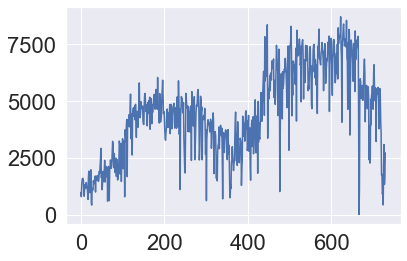

In [25]:
plt.plot(data_day['cnt'].dropna())

(array([181.,   0.,   0., 184.,   0.,   0., 188.,   0.,   0., 178.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

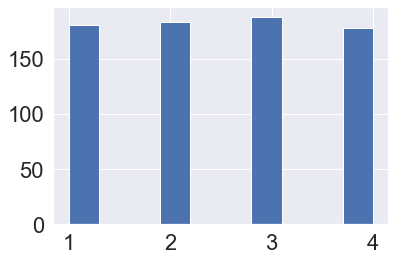

In [26]:
plt.hist(data_day['season'])

In [40]:
season = data_day['season'].unique()
season = list(season)
season

[1, 2, 3, 4]

saving..... season_density


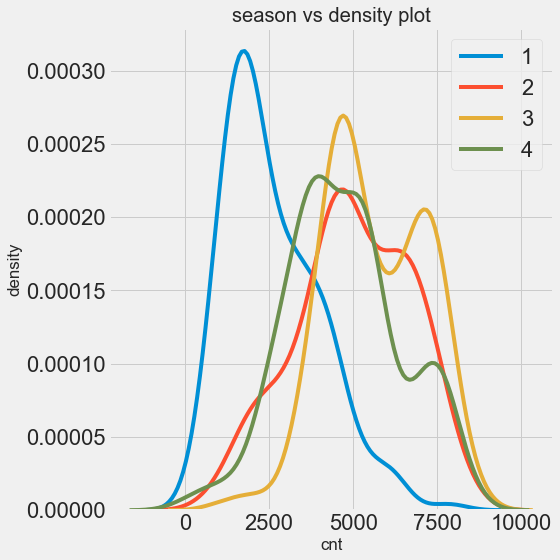

In [73]:
figsize(8,8)
plt.style.use('fivethirtyeight')

for cols in season:
    segment = data_day[data_day['season'] == cols]
    sns.kdeplot(segment['cnt'],label=cols)
plt.xlabel('cnt')
plt.ylabel('density')
plt.title('season vs density plot')
savefigure('season_density')

In [52]:
# above plot shows that the season 1 i.e Winter has more count of rider than others.


working_day = data_day['workingday'].unique()
working_day = list(working_day)
working_day

[0, 1]

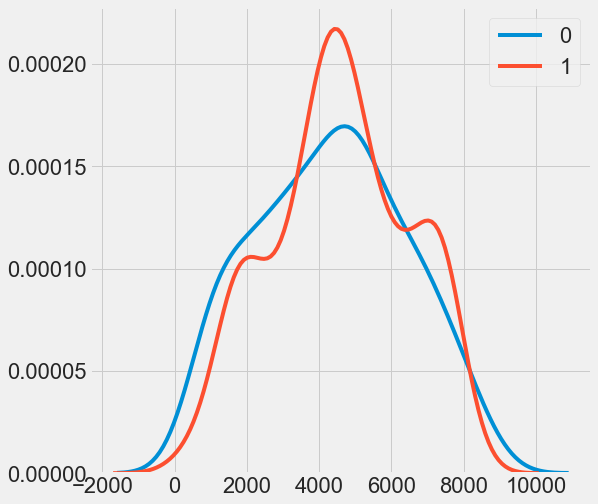

In [53]:
for col in working_day:
    subset = data_day[data_day['workingday']==col]
    sns.kdeplot(subset['cnt'],label=col)

In [68]:
# above graps shows that the rider are more in weekdays than the weekend and the holiday

weekday = data_day['weekday'].unique()
weekday = list(weekday)
weekday

[6, 0, 1, 2, 3, 4, 5]

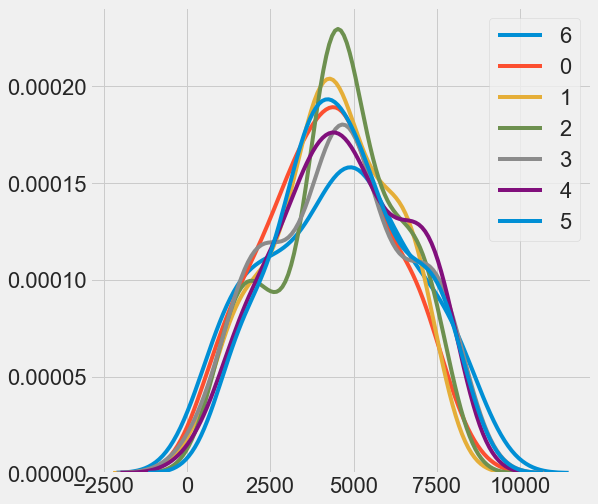

In [69]:
for col in weekday:
    subset = data_day[data_day['weekday']==col]
    sns.kdeplot(subset['cnt'],label=col)

In [140]:
# checcking the correlation between the variables

numerical_features = [features for features in data_day.columns if data_day[features].dtypes != 'O']
print("Number of numeric variables: ",len(numerical_features))
data_day[numerical_features].head()
print(numerical_features)

Number of numeric variables:  15
['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [84]:
categorical_feaures = [features for features in data_day.columns if data_day[features].dtypes == 'O']
print(data_day[categorical_feaures].head())

       dteday
0  2011-01-01
1  2011-01-02
2  2011-01-03
3  2011-01-04
4  2011-01-05


In [92]:
correlation = data_day.corr()['cnt'].sort_values(ascending=False)
print(correlation)

cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64


In [97]:
year = (data_day['yr']).unique()
year = list(year)
year

[0, 1]

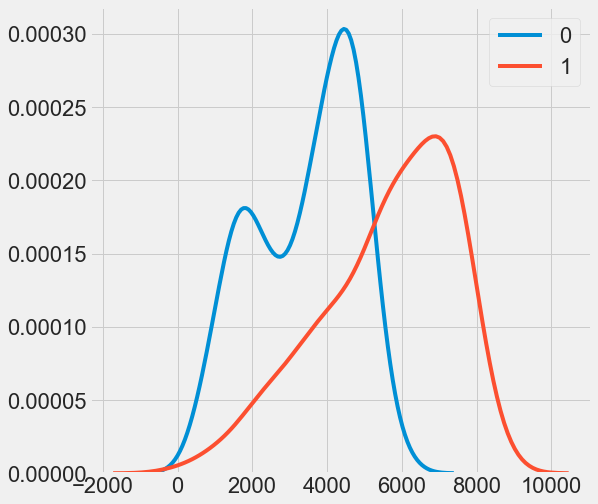

In [102]:
for col in year:
    subset = data_day[data_day['yr'] == col]
    sns.kdeplot(subset['cnt'],label=col)

In [113]:
# Above graphs shows that there is more riders in the year 2010 than 2011

discrete_features = [features for features in numerical_features if len(data_day[features].unique())<25]
print("length of discrete_features",len(discrete_features))
print(discrete_features)

length of discrete_features 7
['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


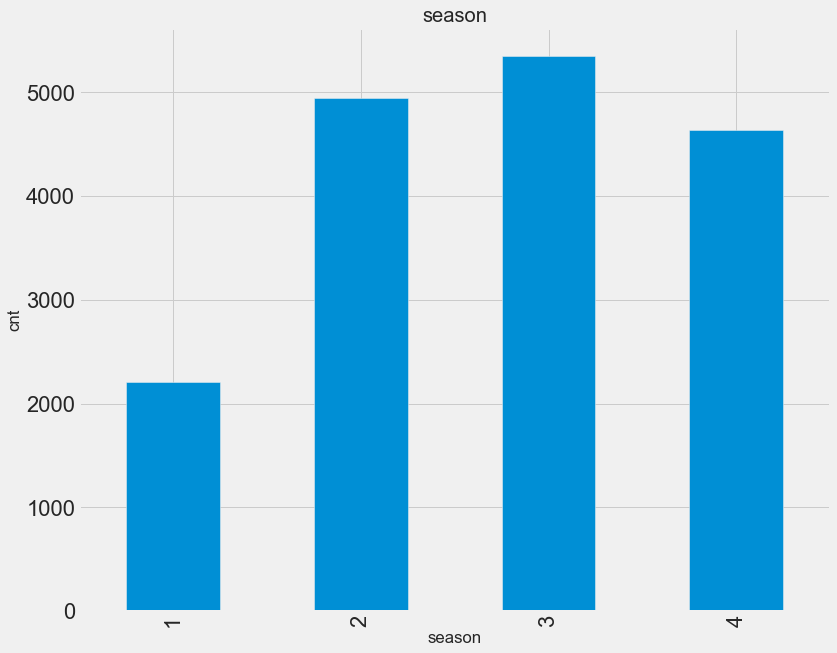

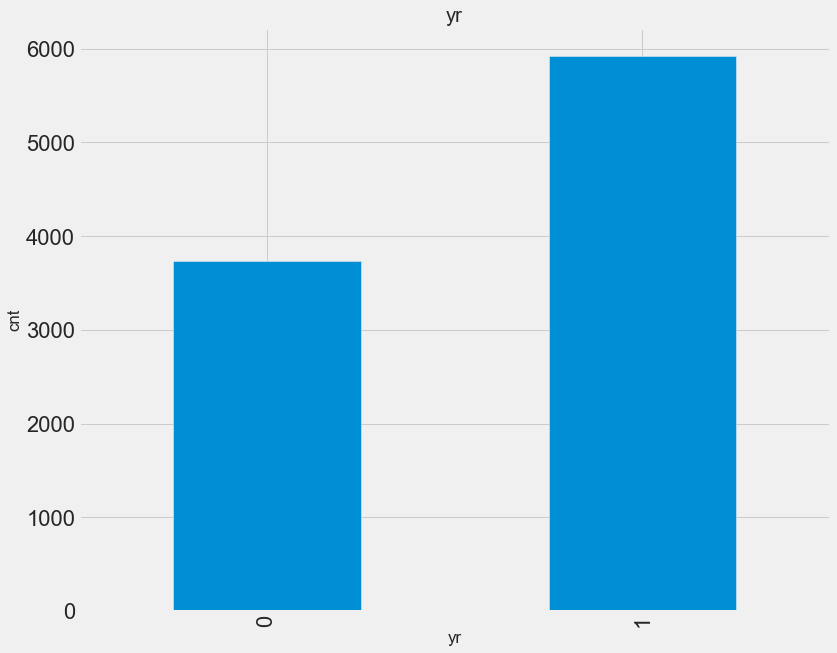

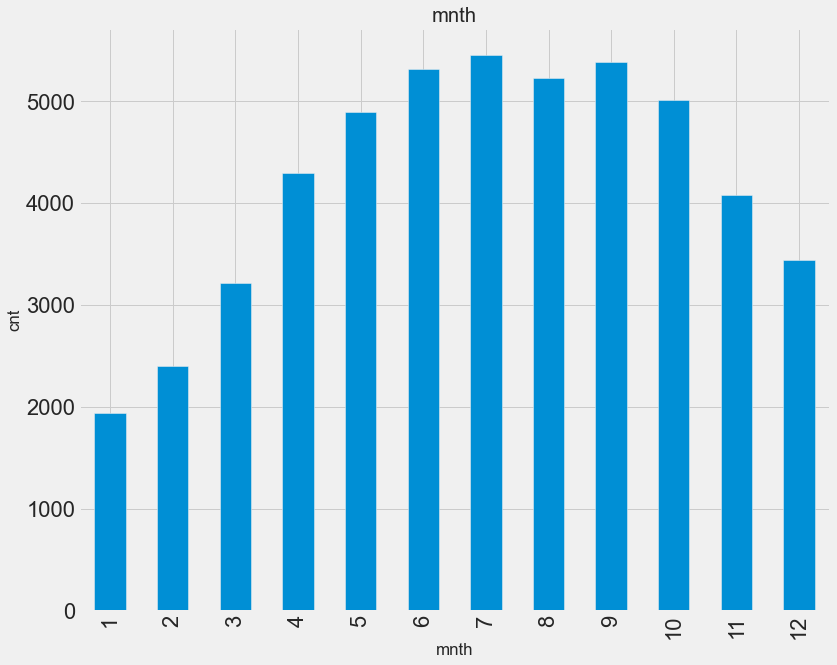

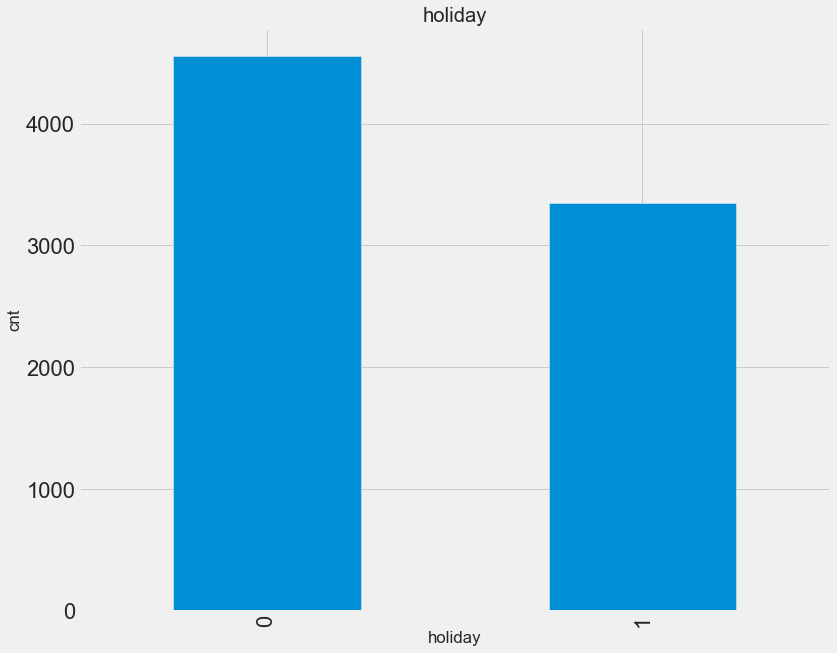

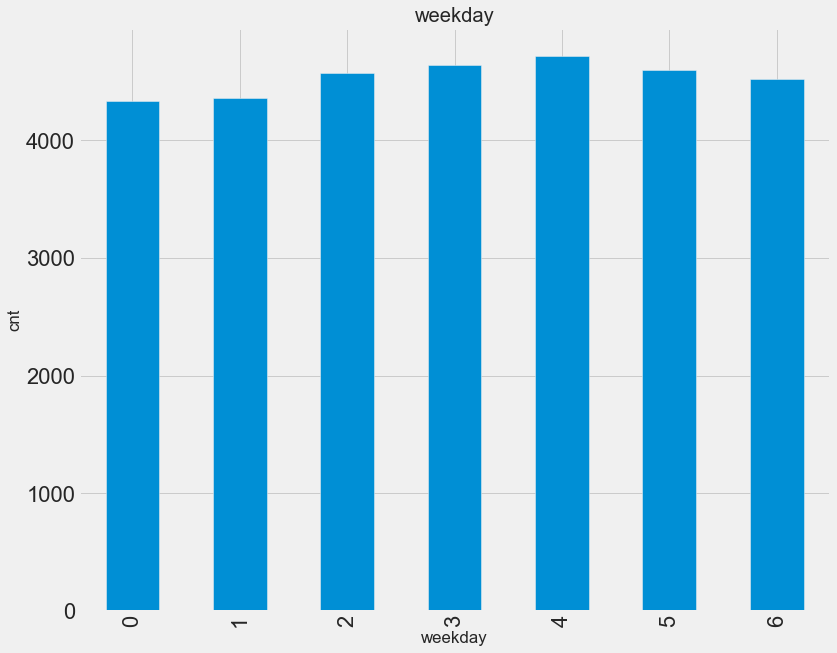

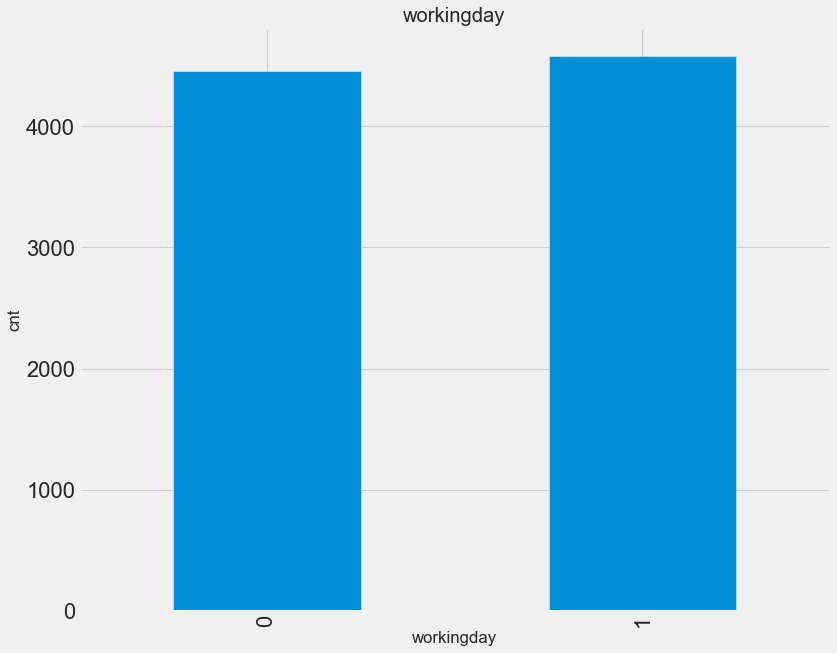

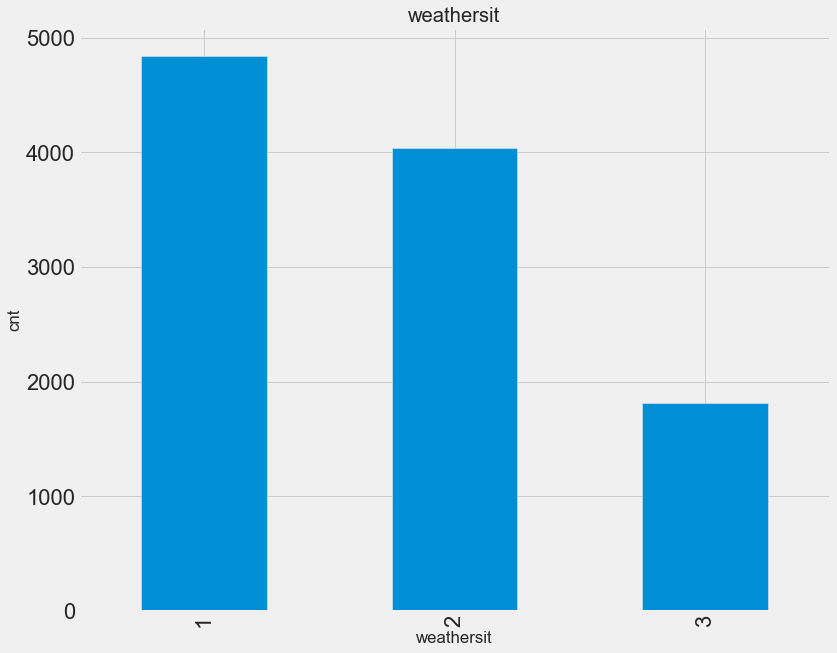

In [150]:
for features in discrete_features:
    data_day.groupby(features)['cnt'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel('cnt')
    plt.title(features)
    plt.show()

In [118]:
continous_feature = [features for features in data_day.columns if features not in discrete_features]
print(continous_feature)

['instant', 'dteday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


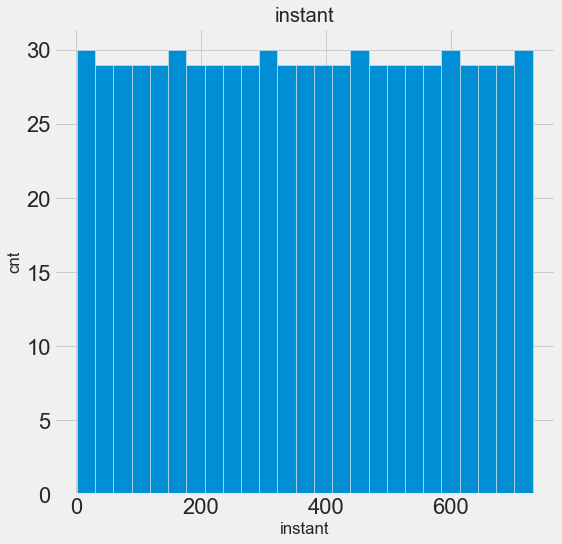

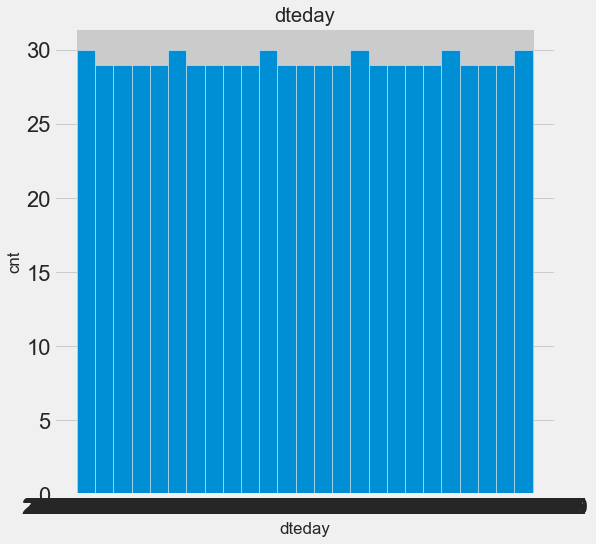

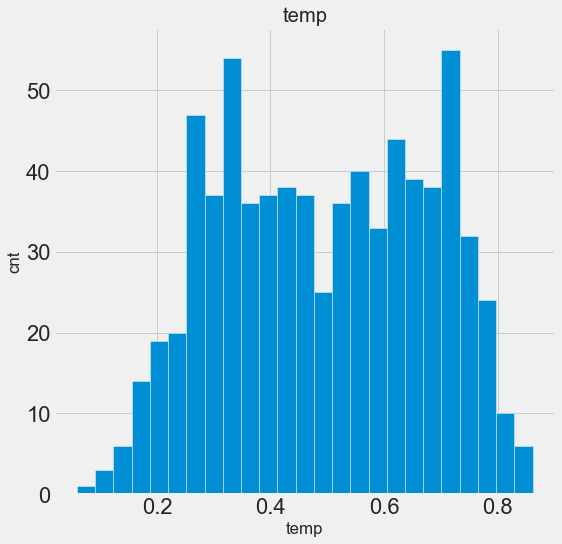

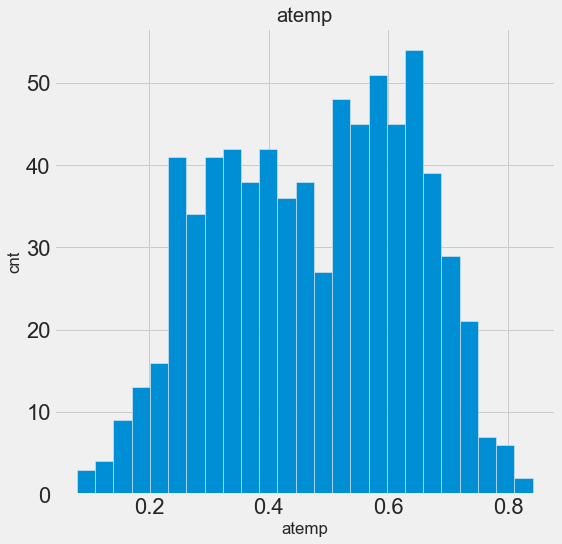

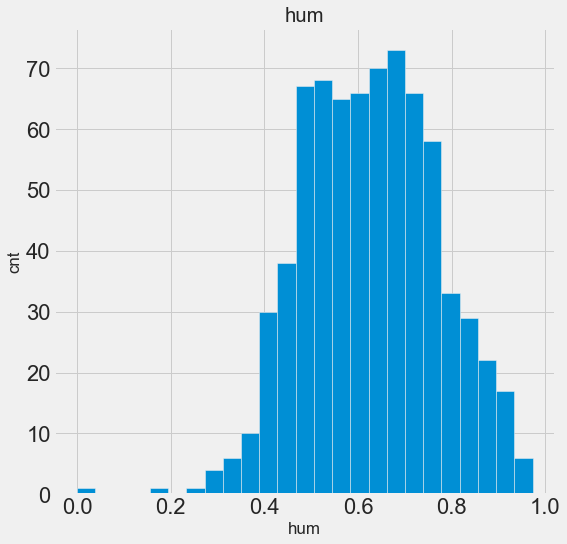

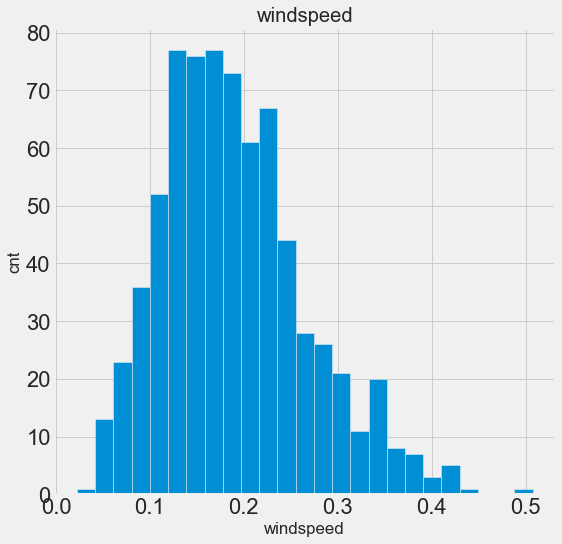

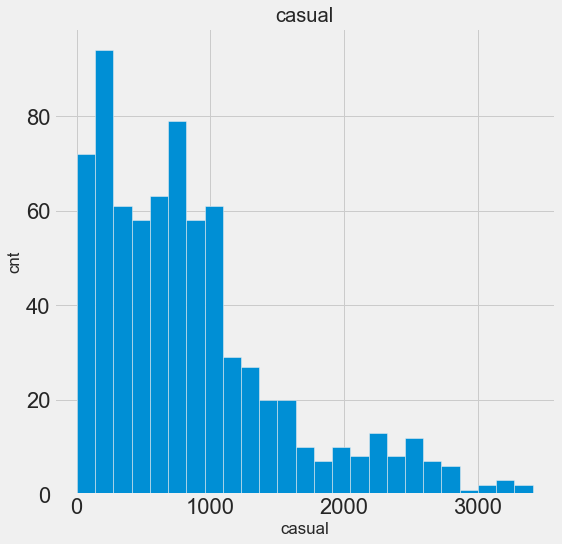

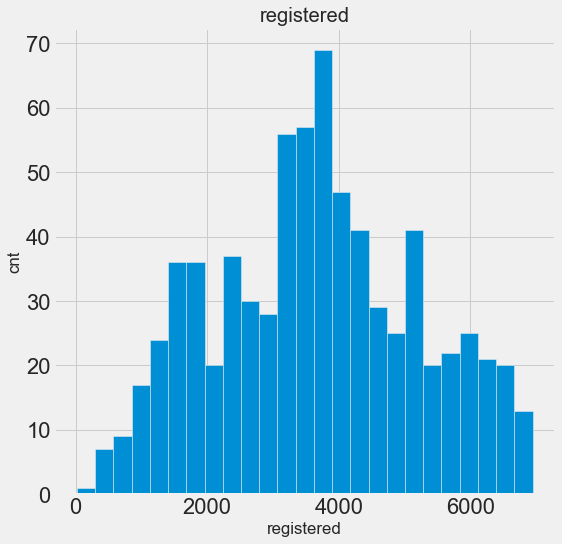

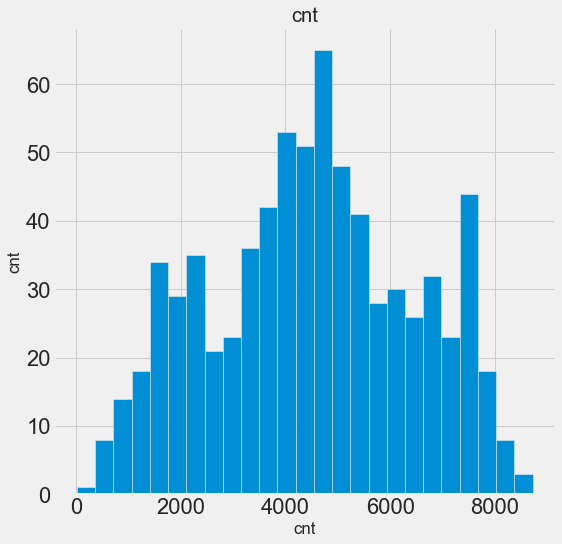

In [124]:
for features in continous_feature:
    data = data_day.copy()
    data[features].hist(bins=25)
    #data.groupby(features)['cnt'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel("cnt")
    plt.title(features)
    plt.show()

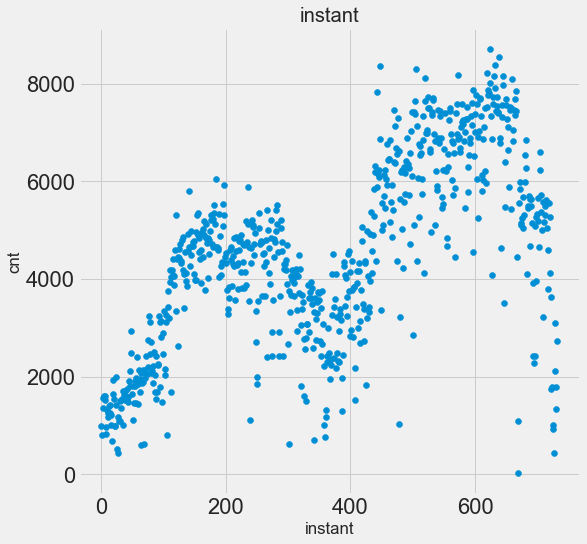

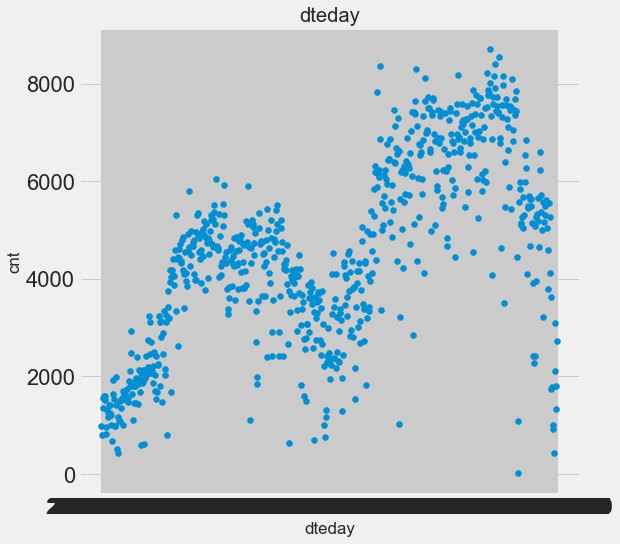

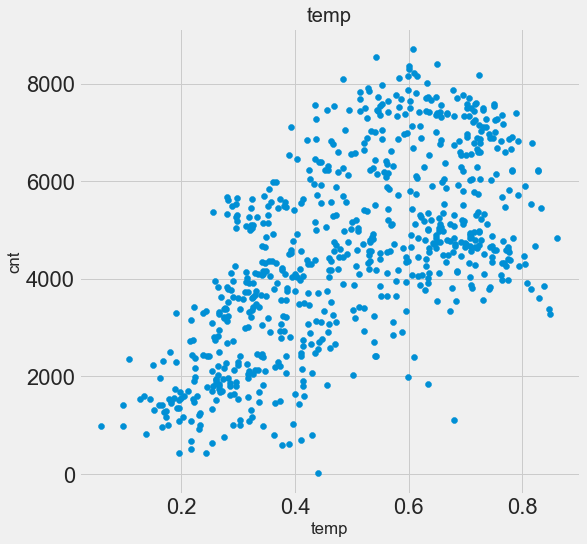

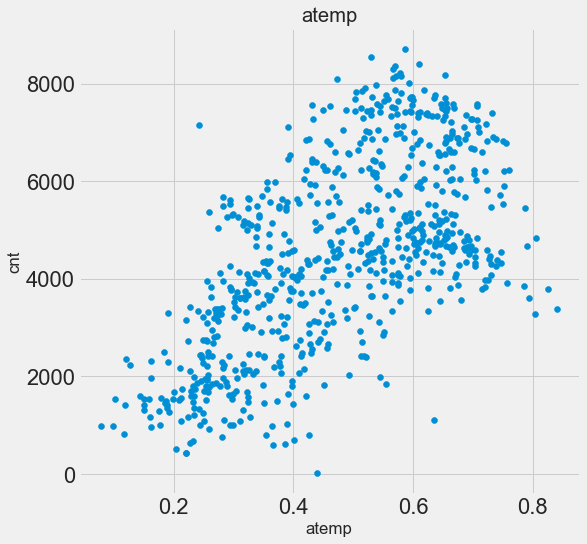

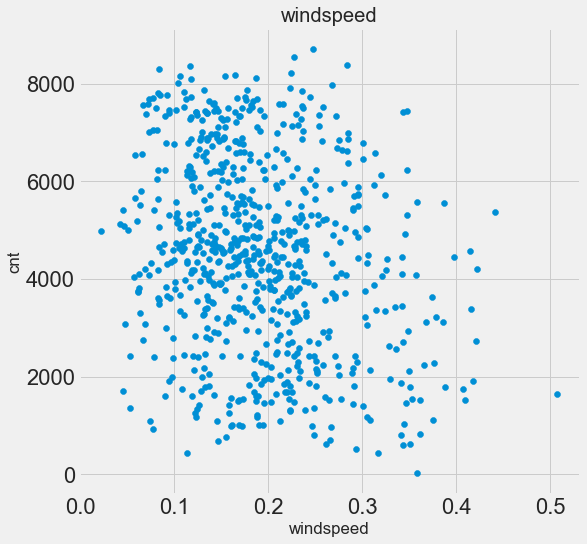

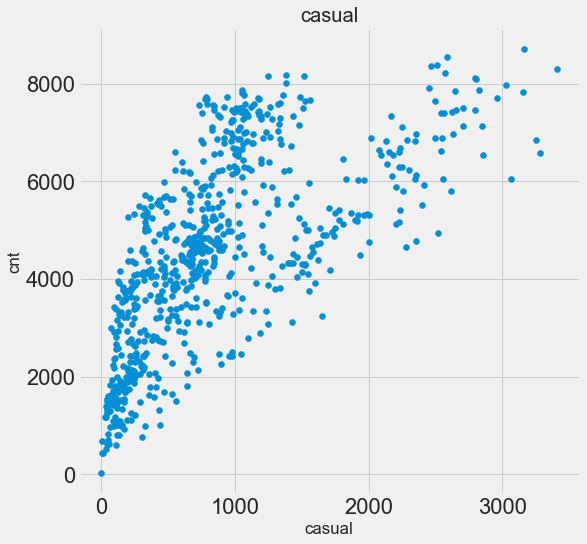

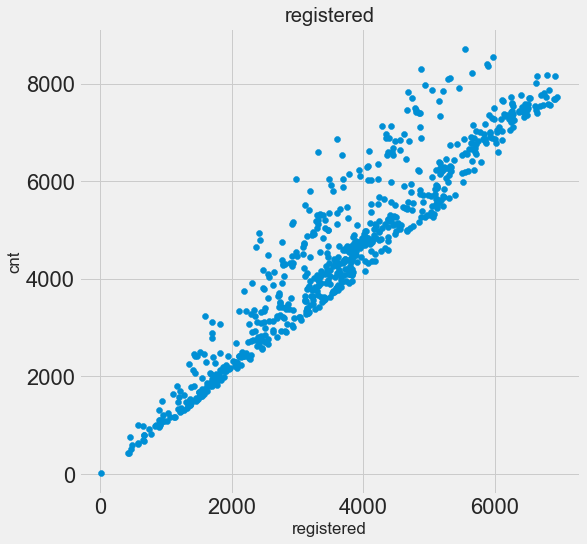

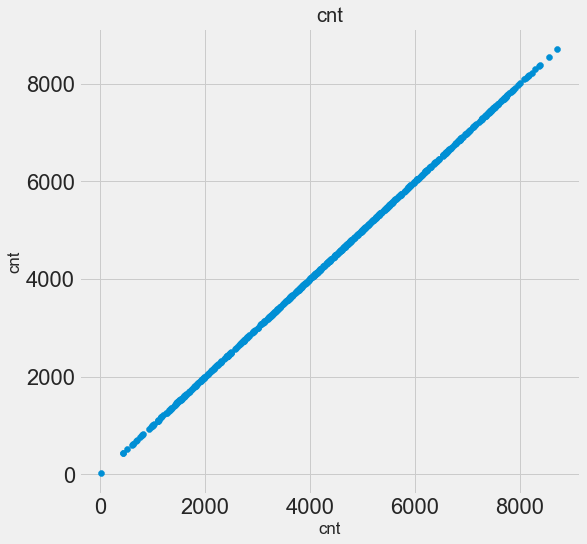

In [127]:
for features in continous_feature:
    data = data_day.copy()
    if 0 in data[features].unique():
        pass
    else:
        plt.scatter(data[features],data['cnt'])
        plt.xlabel(features)
        plt.ylabel('cnt')
        plt.title(features)
        plt.show()

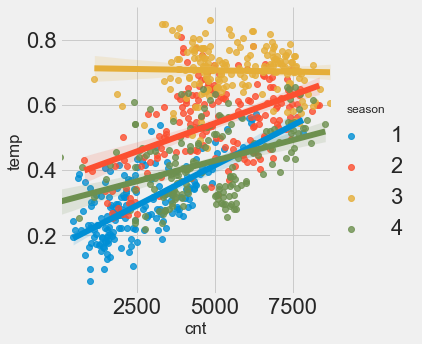

In [139]:
sns.lmplot('cnt','temp',data=data_day, hue='season')

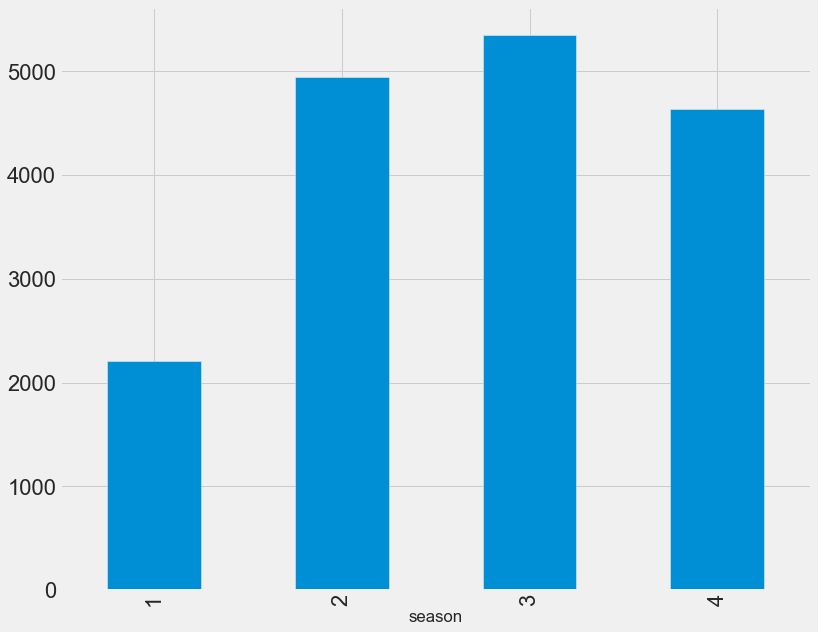

In [149]:
data_day.groupby('season')['cnt'].median().plot.bar()

In [155]:
data_day.groupby('season')['cnt'].median()

season
1    2209.0
2    4941.5
3    5353.5
4    4634.5
Name: cnt, dtype: float64

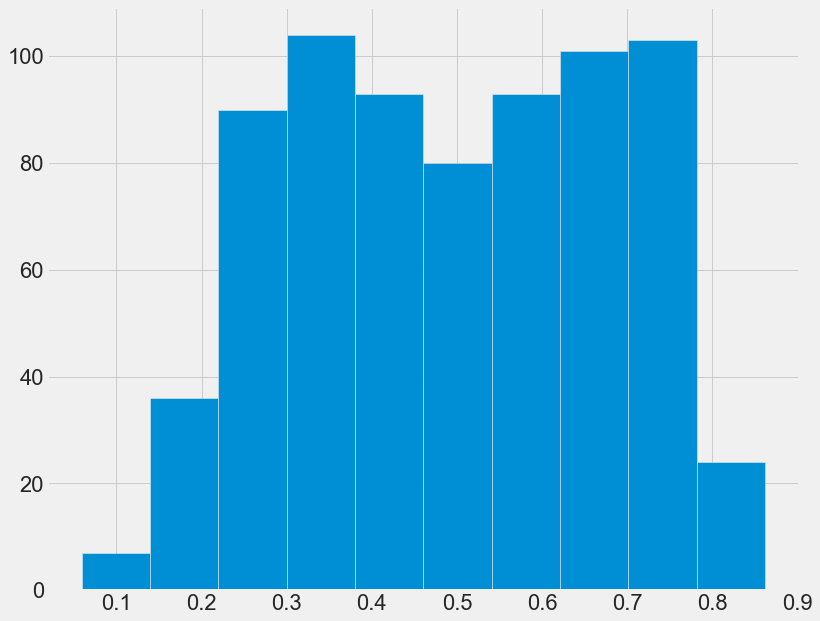

In [158]:
data_day['temp'].hist()

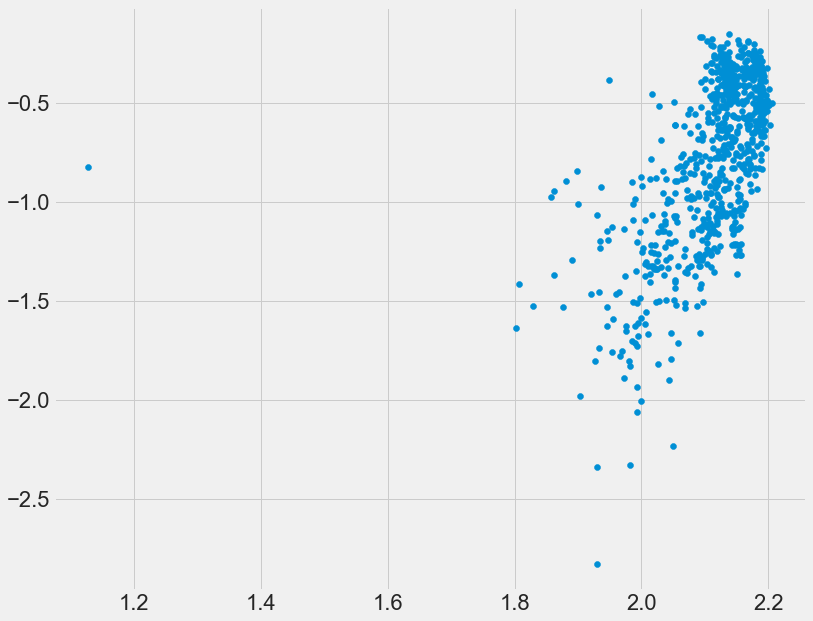

In [180]:
#plt.scatter(data_day['cnt'],data_day['atemp']
plt.scatter(np.log(data_day['cnt']),np.log(data_day['temp']))

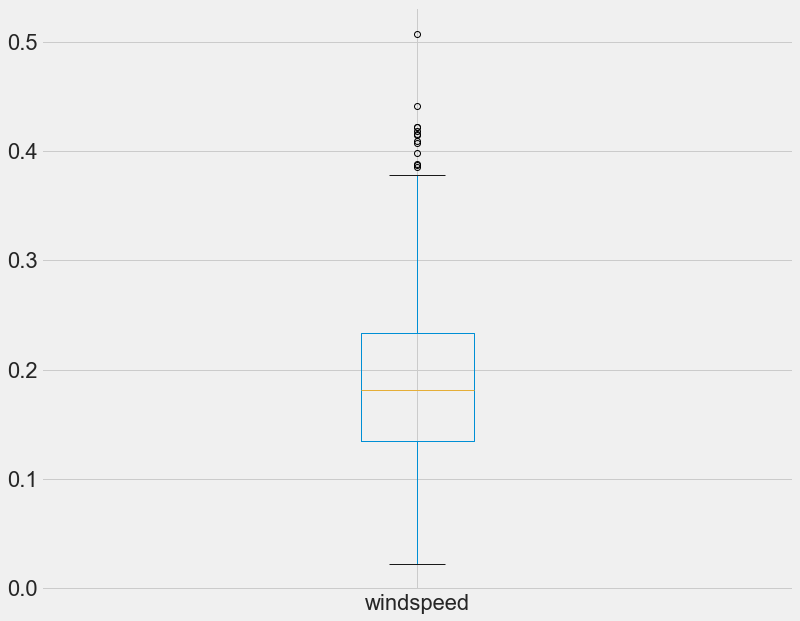

In [188]:
# we can use the boxplot to see the outlier in the continous variables

data_day.boxplot('windspeed')

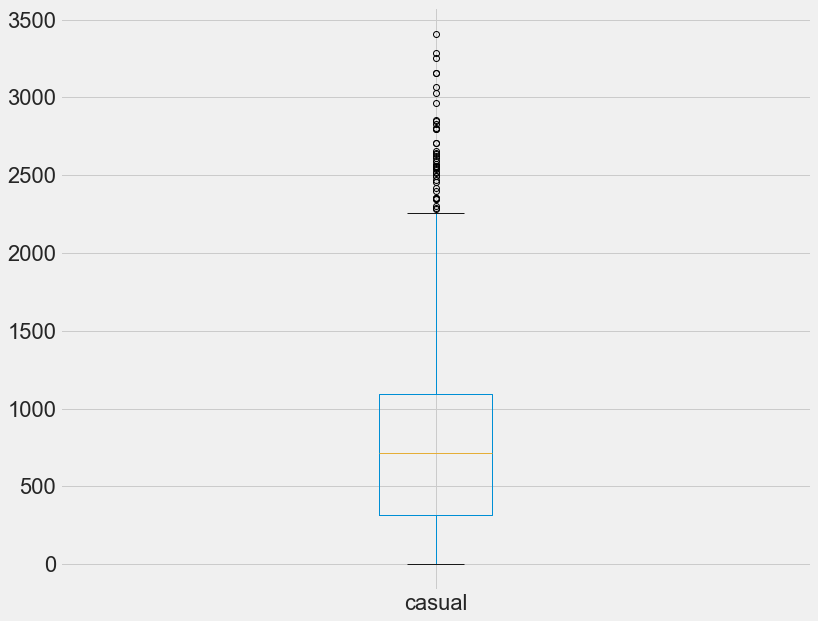

In [191]:
# Above boxplot shows that there is the presence of the outliers

data_day.boxplot('casual')

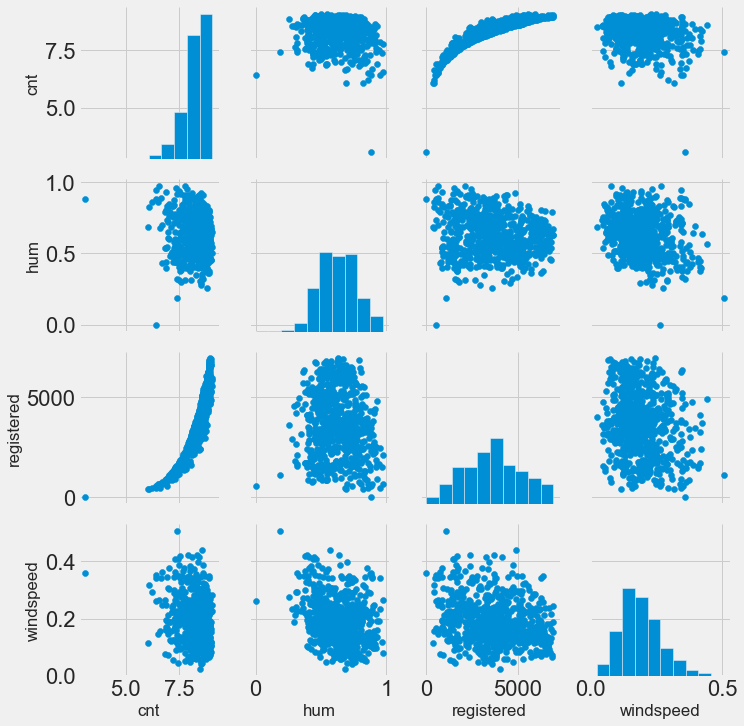

In [194]:
columns = ['cnt','hum','registered','windspeed']
data_plot = data_day[columns]

plot = sns.PairGrid(data_plot)
plot.map_upper(plt.scatter)
plot.map_lower(plt.scatter)
plot.map_diag(plt.hist)
plt.show()

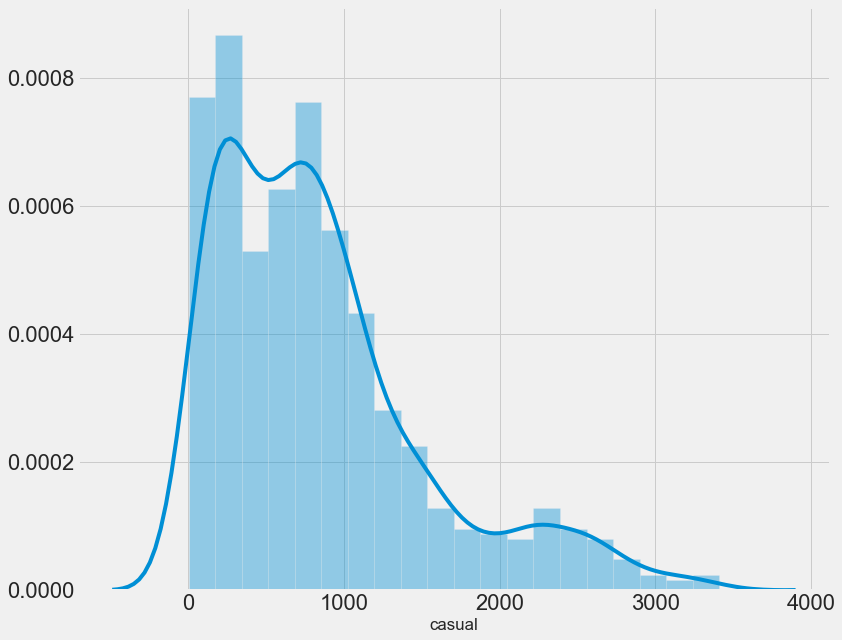

In [200]:
# distplot

sns.distplot(data_day.casual)

In [204]:
# trying to remove ouliers from the  dataset

upper_bound = (data_day.casual.mean()+3*data_day.casual.std()).round(3)
lower_bound = (data_day.casual.mean()-3*data_day.casual.std()).round(3)
upper_bound,lower_bound

(2908.044, -1211.691)

In [205]:
data_day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [211]:
columns = ['cnt','season','yr','weekday','temp','atemp','hum','casual']

In [213]:
data_final = data_day[columns]

features = data_final.drop('cnt',axis=1)
target = data_final['cnt']

In [218]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(584, 7)
(147, 7)
(584,)
(147,)


In [222]:
def rmse(y_true,y_predict):
    return np.sqrt(np.mean(y_true-y_predict)**2).round(5)

In [260]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [261]:
%%timeit -n 1 -r 5
model.fit(x_train,y_train)

5.17 ms ± 2.45 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [ ]:
predicted = model.predict(x_test)
rootmse = rmse(y_test,predicted)
print("the rootmean square error o the model linear regression is",rootmse)

In [231]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
predicted = knn.predict(x_test)
rootmse = rmse(y_test,predicted)
print("the rootmean square error of the mdoel decision tree is ",rootmse)

the rootmean square error of the mdoel decision tree is  0.0506


In [232]:
from sklearn.svm import SVR
model = SVR()
model.fit(x_train,y_train)
predicted = model.predict(x_test)
rootmse = rmse(y_test,predicted)
print("the rmse of the svm is ", rootmse)

the rmse of the svm is  0.07061


In [234]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
predicted = model.predict(x_test)
rootmse = rmse(y_test,predicted)
print("the root mean square error of the random forest is ", rootmse)

the root mean square error of the random forest is  0.02238


In [236]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(x_train,y_train)
predicted = model.predict(x_test)
rootmse = rmse(y_test,predicted)
print("The rmse value of the Gradient boosting is ", rootmse)

The rmse value of the Gradient boosting is  0.02885


In [237]:
# Model optimization 
# Hyper parameter tuning with RandomSearch
# Hyper Parameter tuning with RandomSearch Cross Validation

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

gf = GradientBoostingRegressor(random_state=42)

# Setting the parameters to gain the best results

loss = ['ls', 'lad', 'huber', 'quantile']
n_estimators = [100, 300, 500,700, 900, 1100, 1300]
min_samples_split = [2,3,4,6,8,10,12]
min_samples_leaf = [1,2,4,5,6,7,8]
max_depth =[2,3,4,5,6,7,8]
max_features = ["auto","sqrt","log2",None]

hyperparameter_grid = {"loss":loss,
                      "n_estimators":n_estimators,
                      "min_samples_split":min_samples_split,
                      "max_depth":max_depth,
                      "min_samples_leaf":min_samples_leaf,
                      "max_features":max_features}



random_cv = RandomizedSearchCV(estimator=gf, param_distributions = hyperparameter_grid, cv=5,
                              n_iter=30, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1,
                              return_train_score=True, random_state=42)

In [238]:
#fitting the model with random search CV
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.2min finished


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'loss': ['ls', 'lad', 'huber',
                                                 'quantile'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 5, 6, 7,
                                                             8],
                                        'min_samples_split': [2, 3, 4, 6, 8, 10,
                                                              12],
                                        'n_estimators': [100, 300, 500, 700,
                                                         900, 1100, 1300]},
                   random_state=42, return_train_score=True,
                   s

In [239]:
rand_results = pd.DataFrame(random_cv.cv_results_).sort_values("mean_test_score", ascending=False)
rand_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_loss,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
29,2.937949,0.192046,0.007371,0.000813,1100,6,2,sqrt,3,lad,...,-0.120615,0.015553,1,-0.046835,-0.050409,-0.047945,-0.045072,-0.044434,-0.046939,0.002136
3,0.370208,0.065871,0.004788,0.001163,100,4,8,auto,3,lad,...,-0.120667,0.020444,2,-0.089529,-0.081628,-0.078093,-0.083419,-0.081360,-0.082806,0.003775
5,2.711347,0.137632,0.007182,0.000401,300,12,1,sqrt,7,lad,...,-0.122819,0.014956,3,-0.022867,-0.019647,-0.021757,-0.019833,-0.019175,-0.020656,0.001413
21,1.026054,0.095155,0.005187,0.000399,100,3,7,sqrt,8,lad,...,-0.123329,0.022933,4,-0.054957,-0.047725,-0.047904,-0.047067,-0.047548,-0.049040,0.002971
24,3.107487,0.135663,0.008377,0.001354,300,3,7,None,8,lad,...,-0.123517,0.016898,5,-0.032695,-0.031398,-0.032613,-0.029784,-0.034038,-0.032105,0.001430
8,0.661630,0.009412,0.005785,0.001596,100,2,7,log2,6,lad,...,-0.124170,0.025092,6,-0.062787,-0.057270,-0.055464,-0.062330,-0.055596,-0.058689,0.003226
15,0.722069,0.018401,0.005385,0.000489,300,6,6,sqrt,2,huber,...,-0.124541,0.015832,7,-0.083831,-0.074180,-0.077135,-0.078572,-0.077871,-0.078318,0.003136
7,4.160670,0.191448,0.009974,0.005045,700,3,1,auto,4,huber,...,-0.125503,0.013565,8,-0.002692,-0.002854,-0.003030,-0.003279,-0.002664,-0.002904,0.000229
0,5.475752,0.176124,0.009775,0.000400,700,4,1,log2,6,lad,...,-0.125619,0.011871,9,-0.015186,-0.013856,-0.013795,-0.012782,-0.012624,-0.013649,0.000920
19,4.830477,0.164732,0.009375,0.000488,700,8,7,log2,6,huber,...,-0.126077,0.021155,10,-0.014271,-0.013571,-0.014885,-0.011773,-0.013252,-0.013550,0.001054


In [240]:
rand_results[["mean_test_score","mean_train_score"]].head()

,mean_test_score,mean_train_score
29,-0.120615,-0.046939
3,-0.120667,-0.082806
5,-0.122819,-0.020656
21,-0.123329,-0.049040
24,-0.123517,-0.032105


In [241]:
random_cv.best_estimator_

GradientBoostingRegressor(loss='lad', max_features='sqrt', min_samples_leaf=2,
                          min_samples_split=6, n_estimators=1100,
                          random_state=42)

In [243]:
predicted = random_cv.predict(x_test)
rootrmse = rmse(y_test,predicted)
print("The root mean square of the randomsearchcv is ",rootrmse)

The root mean square of the randomsearchcv is  0.04426


In [244]:
trees_grid = {"n_estimators":[50,60,100,150,170,190,220,250,300,350,400],
             }

gf = GradientBoostingRegressor(criterion='friedman_mse',
                           loss='lad', max_depth=2,
                          max_features='sqrt',
                          min_impurity_decrease=0.0,
                          min_samples_leaf=4, min_samples_split=4,
                          min_weight_fraction_leaf=0.0,
                          random_state=42, subsample=1.0
                          )
grid_search = GridSearchCV(estimator=gf,
    param_grid=trees_grid,scoring="neg_root_mean_squared_error",n_jobs=-1,cv=10,verbose=1,
                           return_train_score=True)

In [245]:
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:   15.3s finished


GridSearchCV(cv=10,
             estimator=GradientBoostingRegressor(loss='lad', max_depth=2,
                                                 max_features='sqrt',
                                                 min_samples_leaf=4,
                                                 min_samples_split=4,
                                                 random_state=42),
             n_jobs=-1,
             param_grid={'n_estimators': [50, 60, 100, 150, 170, 190, 220, 250,
                                          300, 350, 400]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

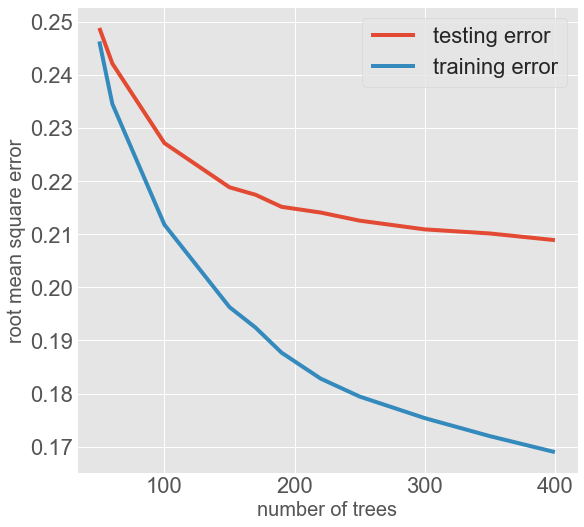

In [246]:
results = pd.DataFrame(grid_search.cv_results_)
figsize(8,8)
plt.style.use("ggplot")
plt.plot(results["param_n_estimators"], -1*results["mean_test_score"], label="testing error")
plt.plot(results["param_n_estimators"], -1*results["mean_train_score"], label="training error")
plt.legend()
plt.ylabel("root mean square error", size=20)
plt.xlabel("number of trees", size= 20)
plt.show()

In [248]:
predicted = grid_search.predict(x_test)
rootmse = rmse(y_test,predicted)
print("The root mean square of the GridSearchCV is", rootmse)

The root mean square of the GridSearchCV is 0.05154


In [249]:
default_model = GradientBoostingRegressor(random_state=42)
final_model = grid_search.best_estimator_
final_model

GradientBoostingRegressor(loss='lad', max_depth=2, max_features='sqrt',
                          min_samples_leaf=4, min_samples_split=4,
                          n_estimators=400, random_state=42)

In [250]:
%%timeit -n 1 -r 5
default_model.fit(x_train,y_train)

151 ms ± 25.1 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [251]:
%%timeit -n 1 -r 5
final_model.fit(x_train,y_train)

562 ms ± 33.6 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [252]:
default_pred = default_model.predict(x_test)
final_pred = final_model.predict(x_test)

In [253]:
print("the default model performance on the test set: rsme = %0.4f"  %rmse(y_test,default_pred))
print("the final model performance on the test set: rsme = %0.4f" %rmse(y_test,final_pred))

the default model performance on the test set: rsme = 0.0289
the final model performance on the test set: rsme = 0.0515


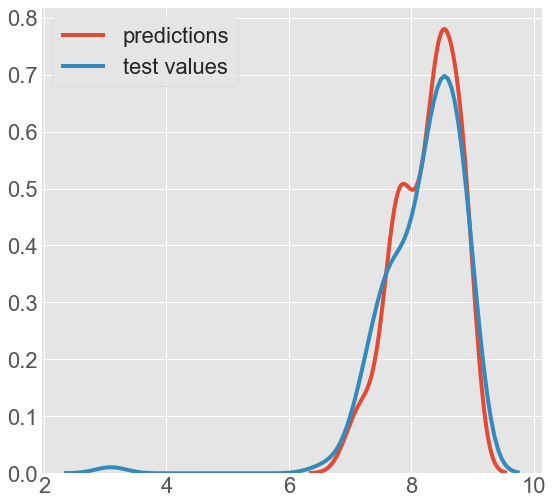

In [254]:
figsize(8,8)
sns.kdeplot(final_pred, label="predictions")
sns.kdeplot(y_test, label="test values")
plt.show()

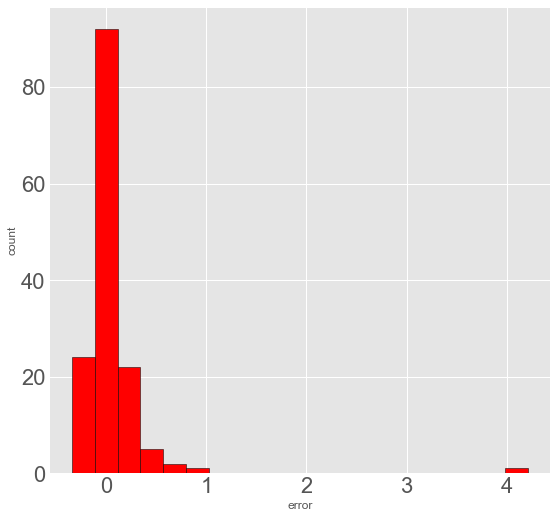

In [255]:
figsize =(6,6)
residuals = final_pred - y_test

plt.hist(residuals, color = "red", bins=20, edgecolor="black")
plt.ylabel("count")
plt.xlabel("error")
plt.show()

In [256]:
# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping


# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense( 50, activation='relu',input_dim = x_train.shape[1]))

# Adding the second hidden layer
model.add(Dense(25,activation='relu'))

# Adding the third hidden layer
model.add(Dense(50,activation='relu'))
# Adding the output layer
model.add(Dense(1))

# Compiling the ANN
model.compile(loss='mean_squared_error', optimizer='Adamax')

#create monitor
monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience=5, verbose=1, mode= "auto")

# Fitting the ANN to the Training set
model_history=model.fit(x_train,y_train, callbacks = [monitor], validation_split=0.20, batch_size = 10,nb_epoch = 1000)

Train on 467 samples, validate on 117 samples
Epoch 1/1000
467/467 [==============================] - 0s 1ms/sample - loss: 50.3458 - val_loss: 23.2116
Epoch 2/1000
467/467 [==============================] - 0s 408us/sample - loss: 24.4933 - val_loss: 21.2436
Epoch 3/1000
467/467 [==============================] - 0s 214us/sample - loss: 23.1447 - val_loss: 22.1798
Epoch 4/1000
467/467 [==============================] - 0s 209us/sample - loss: 21.5234 - val_loss: 19.2691
Epoch 5/1000
467/467 [==============================] - 0s 186us/sample - loss: 22.6616 - val_loss: 20.2569
Epoch 6/1000
467/467 [==============================] - 0s 267us/sample - loss: 21.0106 - val_loss: 16.1564
Epoch 7/1000
467/467 [==============================] - 0s 295us/sample - loss: 19.4920 - val_loss: 17.5109
Epoch 8/1000
467/467 [==============================] - 0s 235us/sample - loss: 18.2981 - val_loss: 15.4310
Epoch 9/1000
467/467 [==============================] - 0s 250us/sample - loss: 19.2831 - va

In [258]:
from sklearn.metrics import mean_squared_log_error
ann_pred = model.predict(x_test)
score = mean_squared_log_error(y_test,ann_pred)

In [259]:
score

0.030399450880911297